In [137]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [141]:
# Step 1: Load the dataset
data = pd.read_csv(r'C:\Users\vansh\Downloads\archive (2)\german_credit_data.csv')

In [143]:
data['Creditworthy'] = np.where((data['Housing'] == 'own') & (data['Credit amount'] > 1000), 1, 0)

In [145]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Creditworthy      1000 non-null   int32 
dtypes: int32(1), int64(5), object(5)
memory usage: 82.2+ KB
None


In [147]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
        Unnamed: 0          Age          Job  Credit amount     Duration  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean    499.500000    35.546000     1.904000    3271.258000    20.903000   
std     288.819436    11.375469     0.653614    2822.736876    12.058814   
min       0.000000    19.000000     0.000000     250.000000     4.000000   
25%     249.750000    27.000000     2.000000    1365.500000    12.000000   
50%     499.500000    33.000000     2.000000    2319.500000    18.000000   
75%     749.250000    42.000000     2.000000    3972.250000    24.000000   
max     999.000000    75.000000     3.000000   18424.000000    72.000000   

       Creditworthy  
count    1000.00000  
mean        0.61800  
std         0.48612  
min         0.00000  
25%         0.00000  
50%         1.00000  
75%         1.00000  
max         1.00000  


In [149]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Creditworthy          0
dtype: int64


In [151]:
print("\nDataset Head:")
print(data.head())


Dataset Head:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Creditworthy  
0           1169         6             radio/TV             1  
1           5951        48             radio/TV             1  
2           2096        12            education             1  
3           7882        42  furniture/equipment             0  
4           4870        24                  car             0  


In [153]:
print("\nColumn Names:")
print(data.columns)


Column Names:
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose',
       'Creditworthy'],
      dtype='object')


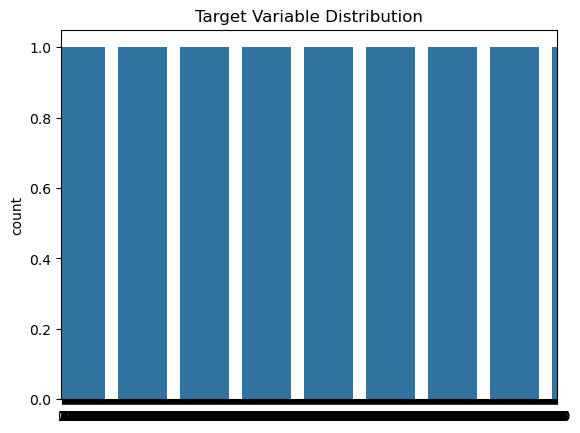

In [155]:
sns.countplot(data['Creditworthy'])  
plt.title('Target Variable Distribution')
plt.show()


In [156]:
from sklearn.preprocessing import  LabelEncoder, StandardScaler
label_encoder = LabelEncoder()

# Apply label encoding for all categorical columns
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Now separate the features (X) and target variable (y)
X = data.drop(columns=['Unnamed: 0'])  
y = data['Creditworthy']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
#Data Preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

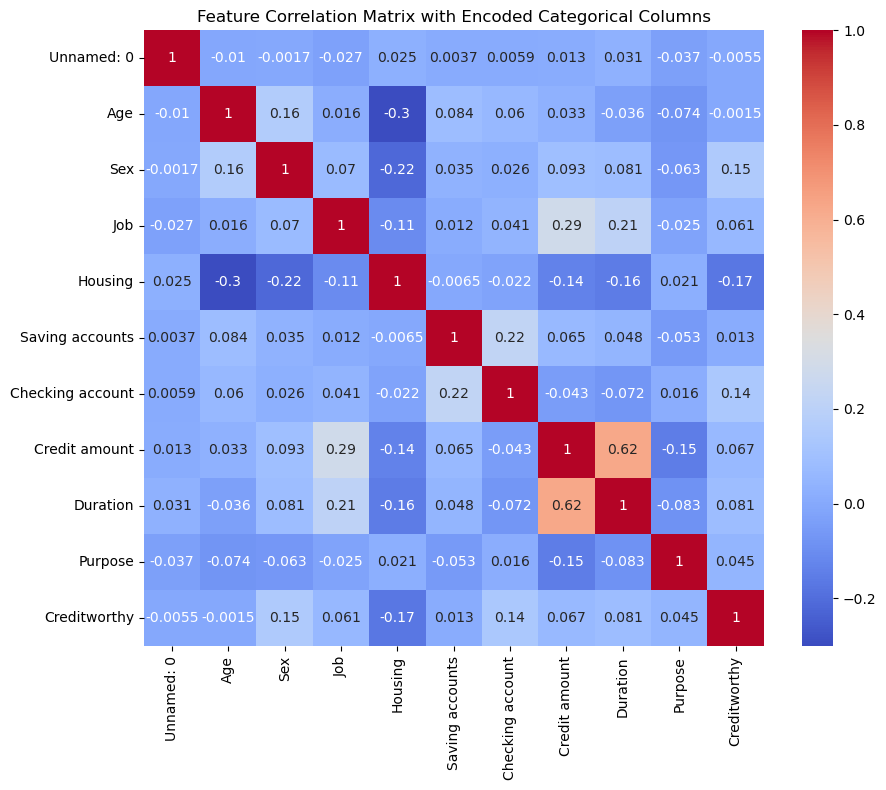

In [158]:
# Now calculate correlation matrix including the encoded categorical columns
correlation_matrix = data_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix with Encoded Categorical Columns')
plt.show()

In [159]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [160]:
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))




Random Forest Performance:
Accuracy: 1.0
Confusion Matrix:
 [[120   0]
 [  0 180]]


In [161]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       180

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [162]:
from sklearn.svm import SVC
# Support Vector Machine (SVM)
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [163]:
print("\nSVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Performance:
Accuracy: 1.0
Confusion Matrix:
 [[120   0]
 [  0 180]]


In [164]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       180

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [165]:
# ROC Curve for Random Forest and SVM
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.predict_proba(X_test)[:, 1]


In [166]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

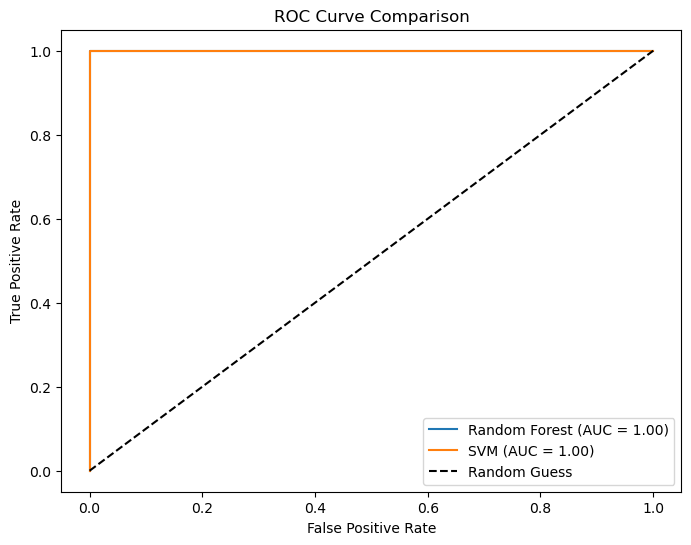

In [167]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [168]:
feature_importances = rf_model.feature_importances_
features = X.columns

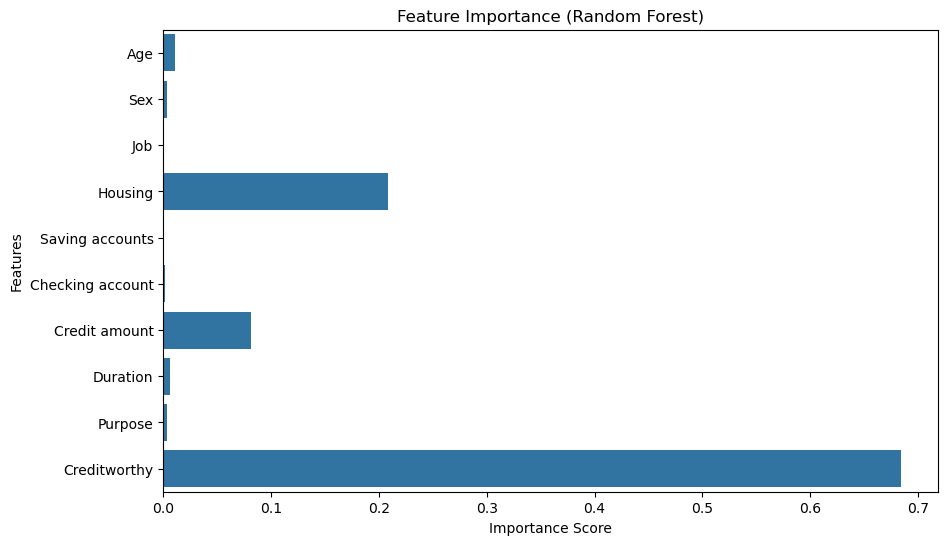

In [169]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()